## Importing the tweets using the Twitter Search API

In [1]:
import tweepy 
import pandas as pd
import sys
import csv
import twitter

consumer_key='qNiCgAd0BPTLNOCjEJE3NYpHD'
consumer_secret='X1v73AqZPfMm1Jd2gwZmmy9iJWjQTT6k8Shi0eBoJJSOaFhX3z'
access_token_key='1306319315629731843-Ixy78hSGwUiYx5zp8ajIAQH9Cz0YRV'
access_token_secret='Sdbinea6vnD6Jq2mnjBLW1fVC6vRrU2H2rL5ZdIVkBiYV'
  
# Fill the X's with the credentials obtained by  
# following the above mentioned procedure. 

api = twitter.Api(consumer_key='qNiCgAd0BPTLNOCjEJE3NYpHD',
                      consumer_secret='X1v73AqZPfMm1Jd2gwZmmy9iJWjQTT6k8Shi0eBoJJSOaFhX3z',
                      access_token_key='1306319315629731843-Ixy78hSGwUiYx5zp8ajIAQH9Cz0YRV',
                      access_token_secret='Sdbinea6vnD6Jq2mnjBLW1fVC6vRrU2H2rL5ZdIVkBiYV')
  
# Function to extract tweets 
def get_tweets(username): 
          
        # Authorization to consumer key and consumer secret 
        auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
  
        # Access to user's access key and access secret 
        auth.set_access_token(access_token_key, access_token_secret) 
  
        # Calling api 
        api = tweepy.API(auth) 
        #set count to however many tweets you want - max count is 3200 and this doesn't have any effect if it is more than 3200
#        number_of_tweets = 5000
       
        tfile = []
        for tweet in tweepy.Cursor(api.user_timeline, screen_name = username).items():

        #username, tweet id, date/time, text
            tfile.append([username, tweet.id_str,tweet.source, tweet.created_at,tweet.retweet_count,tweet.favorite_count, tweet.text.encode("utf-8")])

	#write to a new csv file from the array of tweets
        outfile = username + "_tweets_V1.csv"
        print ("writing to " + outfile)
        with open(outfile, 'w+') as file:
            writer = csv.writer(file, delimiter=',')
            writer.writerow(['User_Name', 'Tweet_ID', 'Source', 'Created_date','Retweet_count','Favorite_count','Tweet'])
            writer.writerows(tfile)
# user name
get_tweets("@JoeBiden")  

writing to @JoeBiden_tweets_V1.csv


## Creating a pandas dataframe for analysis

In [2]:
import pandas as pd
df= pd.read_csv("@JoeBiden_tweets_V1.csv",encoding='utf-8') 
df.head(10)

,User_Name,Tweet_ID,Source,Created_date,Retweet_count,Favorite_count,Tweet
0,@JoeBiden,1313116739299762176,TweetDeck,2020-10-05 14:00:01,19311,127965,b'Imagine a future where:\n\n- Health care is ...
1,@JoeBiden,1312907856161705985,TweetDeck,2020-10-05 00:10:00,19399,104900,b'The economy.\nClimate change.\nHealth care.\...
2,@JoeBiden,1312883193939279872,TweetDeck,2020-10-04 22:32:00,5478,24610,b'It\xe2\x80\x99s time we build an economy whe...
3,@JoeBiden,1312860293085753345,TweetDeck,2020-10-04 21:01:00,4264,21545,b'Today marks 30 days until Election Day. 30 d...
4,@JoeBiden,1312831100914405379,TweetDeck,2020-10-04 19:05:00,34941,313301,"b""Before we're Democrats or Republicans or ind..."
5,@JoeBiden,1312804676547620864,TweetDeck,2020-10-04 17:20:00,7544,35147,b'There are only 30 days until Election Day \x...
6,@JoeBiden,1312776994799661057,TweetDeck,2020-10-04 15:30:00,40803,441434,b'30 days.'
7,@JoeBiden,1312755603215773697,Twitter Media Studio,2020-10-04 14:05:00,29369,165704,"b""Receiving the Medal of Freedom from my frien..."
8,@JoeBiden,1312546726528638977,TweetDeck,2020-10-04 00:15:00,17553,142832,"b'At this moment, we\xe2\x80\x99re facing unpr..."
9,@JoeBiden,1312533640392314882,TweetDeck,2020-10-03 23:23:00,9384,45325,"b'Folks, with just one month left until Electi..."


## Data Cleaning - Text Normalization and removal of special characters

In [3]:
from nltk.tokenize import WordPunctTokenizer
from bs4 import BeautifulSoup
import re
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()

In [4]:
df['Tweet'] = df['Tweet'].apply(tweet_cleaner)
df.head(20)

,User_Name,Tweet_ID,Source,Created_date,Retweet_count,Favorite_count,Tweet
0,@JoeBiden,1313116739299762176,TweetDeck,2020-10-05 14:00:01,19311,127965,b imagine a future where n n health care is a ...
1,@JoeBiden,1312907856161705985,TweetDeck,2020-10-05 00:10:00,19399,104900,b the economy nclimate change nhealth care nci...
2,@JoeBiden,1312883193939279872,TweetDeck,2020-10-04 22:32:00,5478,24610,b it xe x x s time we build an economy where e...
3,@JoeBiden,1312860293085753345,TweetDeck,2020-10-04 21:01:00,4264,21545,b today marks days until election day days unt...
4,@JoeBiden,1312831100914405379,TweetDeck,2020-10-04 19:05:00,34941,313301,b before we re democrats or republicans or ind...
5,@JoeBiden,1312804676547620864,TweetDeck,2020-10-04 17:20:00,7544,35147,b there are only days until election day xe x ...
6,@JoeBiden,1312776994799661057,TweetDeck,2020-10-04 15:30:00,40803,441434,b days
7,@JoeBiden,1312755603215773697,Twitter Media Studio,2020-10-04 14:05:00,29369,165704,b receiving the medal of freedom from my frien...
8,@JoeBiden,1312546726528638977,TweetDeck,2020-10-04 00:15:00,17553,142832,b at this moment we xe x x re facing unprecede...
9,@JoeBiden,1312533640392314882,TweetDeck,2020-10-03 23:23:00,9384,45325,b folks with just one month left until electio...


## Removal of stop words - Final Cleaned up data set

In [5]:
from nltk.corpus import stopwords
from nltk import PorterStemmer
import contractions
ps = PorterStemmer()

stopword = list(stopwords.words('english'))
l = ['b','xe','x','xa','n','rt']
stopword = stopword + l

def cl_text(text):
    text = ' '.join(word for word in text.split() if word not in stopword)
    return text

df['Tweet']=df['Tweet'].apply(cl_text)
df.head(20)



,User_Name,Tweet_ID,Source,Created_date,Retweet_count,Favorite_count,Tweet
0,@JoeBiden,1313116739299762176,TweetDeck,2020-10-05 14:00:01,19311,127965,imagine future health care right end gun viole...
1,@JoeBiden,1312907856161705985,TweetDeck,2020-10-05 00:10:00,19399,104900,economy nclimate change nhealth care ncivil ri...
2,@JoeBiden,1312883193939279872,TweetDeck,2020-10-04 22:32:00,5478,24610,time build economy everyone gets fair return w...
3,@JoeBiden,1312860293085753345,TweetDeck,2020-10-04 21:01:00,4264,21545,today marks days election day days begin resto...
4,@JoeBiden,1312831100914405379,TweetDeck,2020-10-04 19:05:00,34941,313301,democrats republicans independents americans n...
5,@JoeBiden,1312804676547620864,TweetDeck,2020-10-04 17:20:00,7544,35147,days election day many states wait november rd...
6,@JoeBiden,1312776994799661057,TweetDeck,2020-10-04 15:30:00,40803,441434,days
7,@JoeBiden,1312755603215773697,Twitter Media Studio,2020-10-04 14:05:00,29369,165704,receiving medal freedom friend great great hon...
8,@JoeBiden,1312546726528638977,TweetDeck,2020-10-04 00:15:00,17553,142832,moment facing unprecedented crises know americ...
9,@JoeBiden,1312533640392314882,TweetDeck,2020-10-03 23:23:00,9384,45325,folks one month left election day voting under...


## Sentiment Analyzer using VADER

In [6]:
import nltk
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(text):
    score = sentiment.polarity_scores(text)
    lb = score['compound']
    if lb >= 0.05:
        return 1
    elif (lb > -0.05) and (lb < 0.05):
        return 0
    else:
        return -1
    
    
df['VSA'] = np.array([ sentiment_analyzer_scores(tweet) for tweet in df['Tweet'] ])

pos_tweets = [ tweet for index, tweet in enumerate(df['Tweet']) if df['VSA'][index] > 0]
neu_tweets = [ tweet for index, tweet in enumerate(df['Tweet']) if df['VSA'][index] == 0]
neg_tweets = [ tweet for index, tweet in enumerate(df['Tweet']) if df['VSA'][index] < 0]

print("Percentage of positive tweets: {}%".format(len(pos_tweets)*100/len(df['Tweet'])))
print("Percentage of neutral tweets: {}%".format(len(neu_tweets)*100/len(df['Tweet'])))
print("Percentage of negative tweets: {}%".format(len(neg_tweets)*100/len(df['Tweet'])))

Percentage of positive tweets: 48.3348895113601%
Percentage of neutral tweets: 21.03952692187986%
Percentage of negative tweets: 30.62558356676004%


## Display of sentiment scores

In [7]:
df.head()

,User_Name,Tweet_ID,Source,Created_date,Retweet_count,Favorite_count,Tweet,VSA
0,@JoeBiden,1313116739299762176,TweetDeck,2020-10-05 14:00:01,19311,127965,imagine future health care right end gun viole...,-1
1,@JoeBiden,1312907856161705985,TweetDeck,2020-10-05 00:10:00,19399,104900,economy nclimate change nhealth care ncivil ri...,1
2,@JoeBiden,1312883193939279872,TweetDeck,2020-10-04 22:32:00,5478,24610,time build economy everyone gets fair return w...,1
3,@JoeBiden,1312860293085753345,TweetDeck,2020-10-04 21:01:00,4264,21545,today marks days election day days begin resto...,1
4,@JoeBiden,1312831100914405379,TweetDeck,2020-10-04 19:05:00,34941,313301,democrats republicans independents americans n...,-1


## Visualization of most common words - Word Cloud and Bar Chart

There are 218323 words in the combination of all tweets.


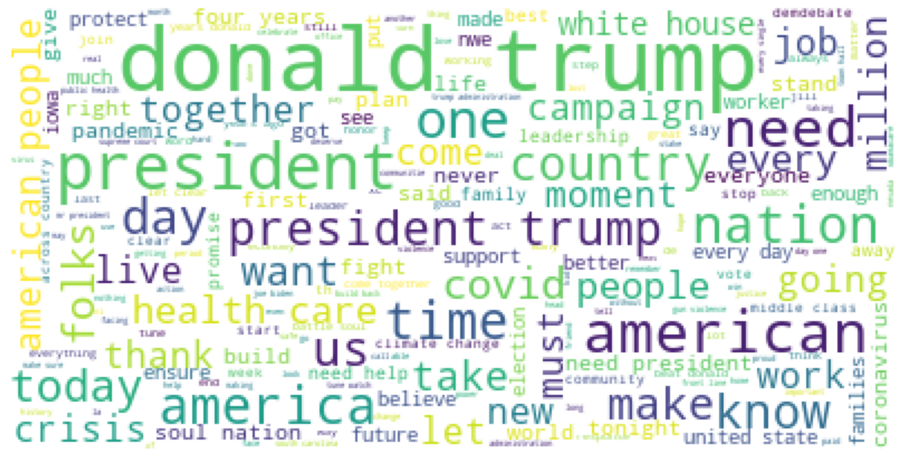

In [8]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

mpl.rcParams['figure.figsize']=(16.0,10.0)    
mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=1400             
mpl.rcParams['figure.subplot.bottom']=.1 

stopwords = set(STOPWORDS)
text = " ".join(tweet for tweet in df.Tweet)
print ("There are {} words in the combination of all tweets.".format(len(text)))

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(text))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("word1.png", dpi=1400)

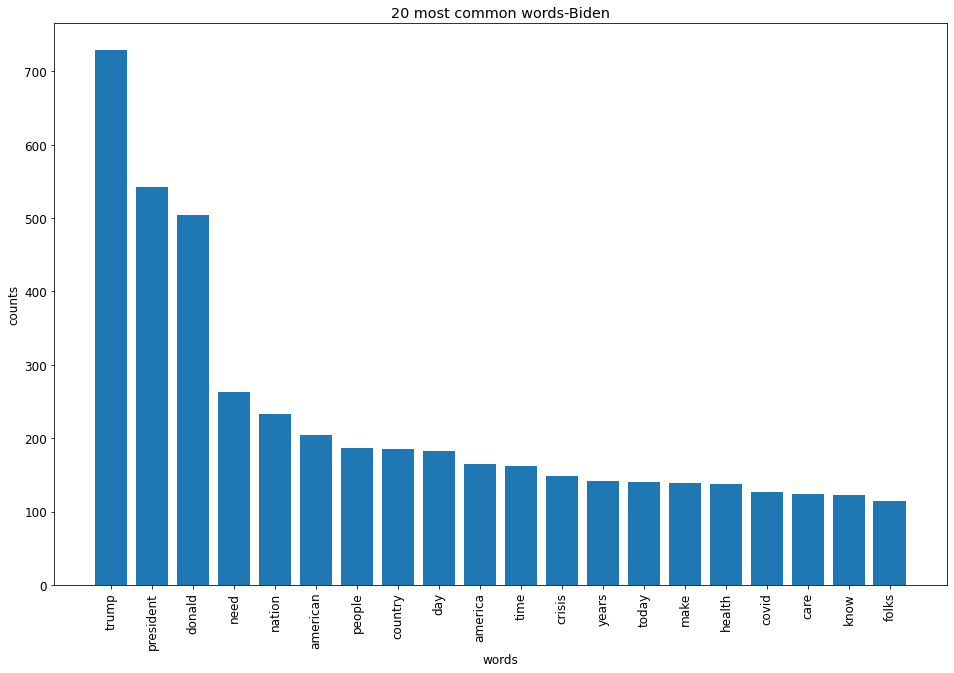

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_20_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    plt.figure(figsize=(16, 10))
    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('20 most common words-Biden')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df['Tweet'])

# Visualise the 20 most common words
plot_20_most_common_words(count_data, count_vectorizer)


## Final Plot of positive, negative and neutral sentiments

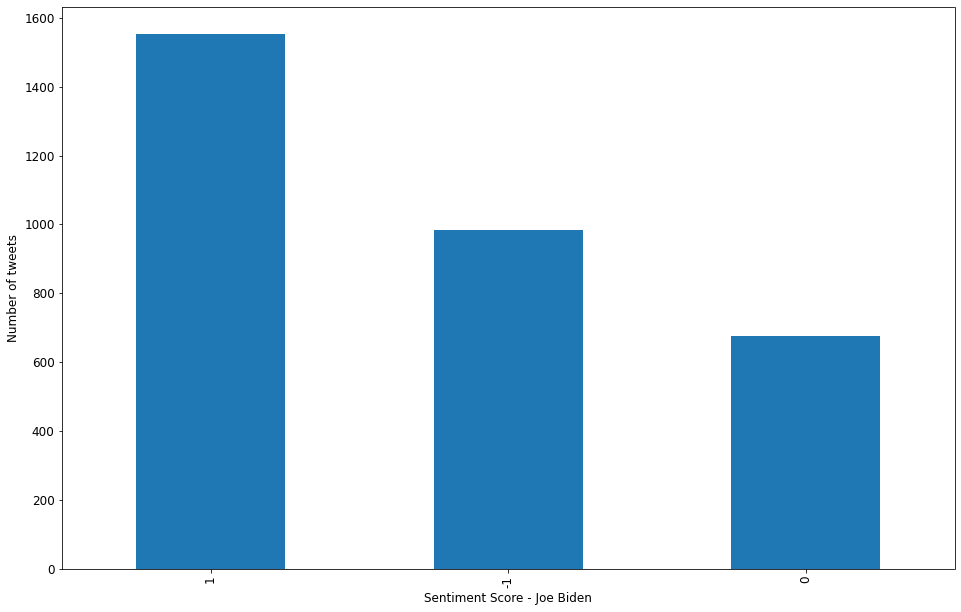

In [12]:
import matplotlib.pyplot as plt
df['VSA'].value_counts().plot(kind = 'bar')
plt.xlabel('Sentiment Score - Joe Biden')
plt.ylabel('Number of tweets')
plt.show()